In [4]:
# @title General Imports necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# @title Train and Test Data stored in Two dataframes
train_data = pd.read_csv(r"/content/train (1).csv")
test_data  = pd.read_csv(r"/content/test (1).csv")

In [6]:
# @title Data Exploration
train_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [7]:
test_data.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [8]:
train_data["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [9]:
train_data[train_data['target']==0]['text']

15                                         What's up man?
16                                          I love fruits
17                                       Summer is lovely
18                                      My car is so fast
19                           What a goooooooaaaaaal!!!!!!
                              ...                        
7581    @engineshed Great atmosphere at the British Li...
7582    Cramer: Iger's 3 words that wrecked Disney's s...
7584    These boxes are ready to explode! Exploding Ki...
7587                                   Sirens everywhere!
7593    I just heard a really loud bang and everyone i...
Name: text, Length: 4342, dtype: object

In [10]:
train_data[train_data['target']==1]['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
train_data.shape

(7613, 5)

In [13]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [14]:
# @title Imports Necessary for Text Preprocessing
import re
import nltk


In [15]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# @title Stop Words Retreival
lm = WordNetLemmatizer()
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# @title Text Preprocessing Steps
tweet = []
for i in train_data['text']:
    p = i.lower()                                   #lowercasing
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', p)      #removing links and mentions
    p = re.sub(r'[^A-Za-z]',' ',p)                  #removing special characters and numbers
    p = word_tokenize(p)                            #tokenization
    p = [i for i in p if i not in sw]               #removing stopwords
    p = [lm.lemmatize(i) for i in p]                #stemming or lemmatization
    p = ' '.join(p)
    tweet.append(p)
print(tweet)

['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident asked shelter place notified officer evacuation shelter place order expected', 'people receive wildfire evacuation order california', 'got sent photo ruby alaska smoke wildfire pours school', 'rockyfire update california hwy closed direction due lake county fire cafire wildfire', 'flood disaster heavy rain cause flash flooding street manitou colorado spring area', 'top hill see fire wood', 'emergency evacuation happening building across street', 'afraid tornado coming area', 'three people died heat wave far', 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding', 'raining flooding florida tampabay tampa day lost count', 'flood bago myanmar arrived bago', 'damage school bus multi car crash breaking', 'man', 'love fruit', 'summer lovely', 'car fast', 'goooooooaaaaaal', 'ridiculous', 'london cool', 'love skiing', 'wonderful day', 'looooool', 'way eat 

In [18]:
# @title Import for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# @title Feature Extraction

cv = CountVectorizer()
sm = cv.fit_transform (tweet).toarray()
unique_words = cv.get_feature_names_out()
print(len(unique_words))

# TO VISUALISE THE SIZE OF THE COUNTER VECTOR ARRAY

12633


In [20]:
x = sm #ARRAY
y = train_data.iloc[:,-1] #TARGET
print(x.shape,y.shape)
print(type(x),type(y))

(7613, 12633) (7613,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [21]:
# @title Splitting the Data into Train and Test Data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42) #CHECK OUT ABOUT RANDOM STATE
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5709, 12633)
(1904, 12633)
(5709,)
(1904,)


In [22]:
# @title Import For SVM Model
from sklearn.svm import SVC

In [23]:
# @title Training the Model
svl = SVC(kernel='linear',C=5)  #C=5 POINTS CAN BE MAXIMUM NEGLECTED
svl.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [24]:
# @title Performance Attributes of the model
%%time
print('Training score : ',svl.score(x_train,y_train))  #TO PROVIDE PERFORMANCE MEASURE FOR THE GIVEN DATASET
print('Testing score : ',svl.score(x_test,y_test))

Training score :  0.9854615519355404
Testing score :  0.7557773109243697
CPU times: user 5min 53s, sys: 1min, total: 6min 54s
Wall time: 4min 6s


In [25]:
# @title Prediction of Test Data
svl_pred = svl.predict(x_test)
print(svl_pred)

[0 1 1 ... 1 0 0]


In [26]:
# @title Performance Analysis
from sklearn.metrics import confusion_matrix,classification_report  # WAYS TO ANALYSE PREDICTED VALUES

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # TO ANALYSE PERFORMANCE OF THE MODEL

In [28]:
svl_acc = accuracy_score(y_test,svl_pred)
print('Accuracy by SVM classifier with linear kernel : ',svl_acc)

Accuracy by SVM classifier with linear kernel :  0.7557773109243697


In [29]:
svl_cm = confusion_matrix(y_test,svl_pred)
print(svl_cm)
print(classification_report(y_test,svl_pred))

[[884 207]
 [258 555]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1091
           1       0.73      0.68      0.70       813

    accuracy                           0.76      1904
   macro avg       0.75      0.75      0.75      1904
weighted avg       0.75      0.76      0.75      1904



In [30]:
# @title 2ND MODEL : NAIVE BAYESIAN (MULTINOMIAL)
from sklearn.naive_bayes import MultinomialNB  #TO HAVE MORE ACCURACY

In [31]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [32]:
print('Training Score : ',mnb.score(x_train,y_train))
print('Testing Score  : ',mnb.score(x_test,y_test))

Training Score :  0.9026099141706078
Testing Score  :  0.8014705882352942


In [33]:
mnb_pred = mnb.predict(x_test)
mnb_pred

array([0, 0, 1, ..., 1, 0, 1])

In [34]:
mnb_acc = accuracy_score(y_test,mnb_pred)
print('Accuracy by MNB : ',mnb_acc)

Accuracy by MNB :  0.8014705882352942


In [35]:
mnb_cm = confusion_matrix(y_test,mnb_pred)
print(mnb_cm)
print(classification_report(y_test,mnb_pred))

[[923 168]
 [210 603]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1091
           1       0.78      0.74      0.76       813

    accuracy                           0.80      1904
   macro avg       0.80      0.79      0.80      1904
weighted avg       0.80      0.80      0.80      1904



In [36]:
# @title 3RD MODEL : LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
print('Training Score : ',lr.score(x_train,y_train))
print('Testing Score  : ',lr.score(x_test,y_test))

Training Score :  0.954457873533018
Testing Score  :  0.8051470588235294


In [39]:
lr_pred = lr.predict(x_test)
lr_pred

array([0, 0, 1, ..., 1, 0, 1])

In [40]:
lr_acc = accuracy_score(y_test,lr_pred)
print('Accuracy by LR : ',lr_acc)

Accuracy by LR :  0.8051470588235294


In [41]:
lr_cm = confusion_matrix(y_test,lr_pred)
print(lr_cm)
print(classification_report(y_test,lr_pred))

[[945 146]
 [225 588]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1091
           1       0.80      0.72      0.76       813

    accuracy                           0.81      1904
   macro avg       0.80      0.79      0.80      1904
weighted avg       0.80      0.81      0.80      1904



In [42]:
print(svl_pred,mnb_pred,lr_pred)

[0 1 1 ... 1 0 0] [0 0 1 ... 1 0 1] [0 0 1 ... 1 0 1]


In [43]:
print(svl_acc,mnb_acc,lr_acc)

0.7557773109243697 0.8014705882352942 0.8051470588235294


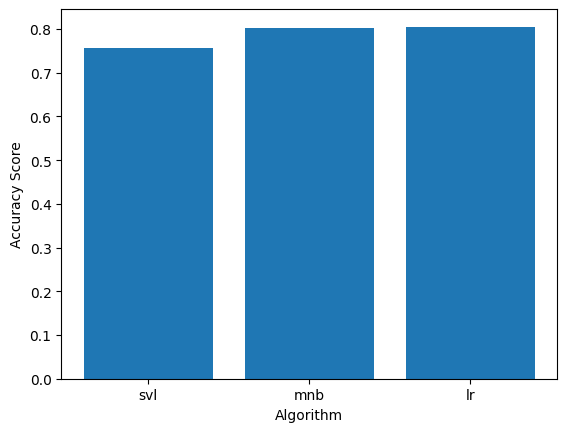

In [44]:
plt.bar(x = ['svl','mnb','lr'],height = [svl_acc, mnb_acc, lr_acc])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.show()

In [45]:
test_data['text']

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [46]:
new_tweet = []
for i in test_data['text']:
    p = i.lower()
    p = re.sub(r'http\S+|www\S+|@\w+', ' ',p)
    p = re.sub(r'[^A-Za-z]', ' ', p)
    p = word_tokenize(p)
    p = [i for i in p if i not in sw]
    p = [lm.lemmatize(i) for i in p]
    p = ' '.join(p)
    new_tweet.append(p)
print(new_tweet)

['happened terrible car crash', 'heard earthquake different city stay safe everyone', 'forest fire spot pond goose fleeing across street save', 'apocalypse lighting spokane wildfire', 'typhoon soudelor kill china taiwan', 'shaking earthquake', 'probably still show life arsenal yesterday eh eh', 'hey', 'nice hat', 'fuck', 'like cold', 'nooooooooo', 'tell', '', 'awesome', 'birmingham wholesale market ablaze bbc news fire break birmingham wholesale market', 'wear short race ablaze', 'previouslyondoyintv toke makinwa marriage crisis set nigerian twitter ablaze', 'check nsfw', 'psa splitting personality techie follow burner follow', 'beware world ablaze sierra leone amp guap', 'burning man ablaze turban diva via', 'dis song people take thing run smh eye opener though set game ablaze', 'rape victim dy set ablaze year old girl died burn injury set ablaze', 'setting ablaze', 'bin front field house wer set ablaze day flame went rite hydro pole wonder', 'nowplaying alfons ablaze pul radio pulsra

In [47]:
pred_x = cv.transform(new_tweet)

In [48]:
pred = lr.predict(pred_x)
pred

array([1, 1, 1, ..., 1, 1, 0])

In [49]:
submissions = pd.read_csv(r"/content/sample_submission.csv")

In [50]:
match = accuracy_score(submissions.iloc[:,-1],pred)
print("Match : ",match)

Match :  0.6420471958320564
